In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

**NOTE TO RACHEL**
the function below is copied from online because I was for some stupid reason having trouble reading the .txt into python because it is fromatted weirdly. The function below basically gets rid

In [2]:
def justify(a, invalid_val=0, axis=1, side='left'):    
    """
    Justifies a 2D array

    Parameters
    ----------
    A : ndarray
        Input array to be justified
    axis : int
        Axis along which justification is to be made
    side : str
        Direction of justification. It could be 'left', 'right', 'up', 'down'
        It should be 'left' or 'right' for axis=1 and 'up' or 'down' for axis=0.

    """

    if invalid_val is np.nan:
        mask = ~np.isnan(a)
    else:
        mask = a!=invalid_val
    justified_mask = np.sort(mask,axis=axis)
    if (side=='up') | (side=='left'):
        justified_mask = np.flip(justified_mask,axis=axis)
    out = np.full(a.shape, invalid_val) 
    if axis==1:
        out[justified_mask] = a[mask]
    else:
        out.T[justified_mask.T] = a.T[mask.T]
    return out

In [3]:
dataset = pd.read_csv("abs_coefficient.txt", header = None, sep=' ')
dataset1 = pd.DataFrame(justify(dataset.values, invalid_val=np.nan, axis=1, side='left'))

wavenums = dataset1[0]
absorption_coefficients_pp = dataset1[2]

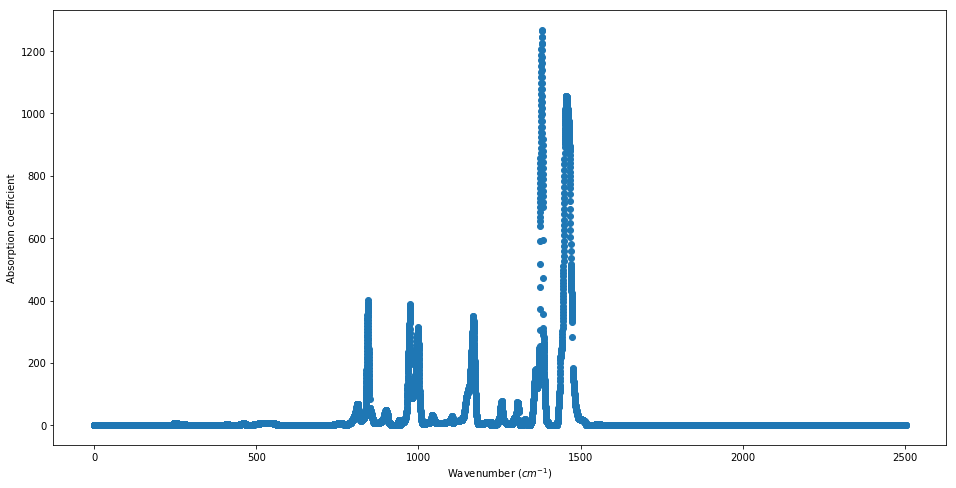

In [4]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(wavenums, absorption_coefficients_pp)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorption coefficient')
plt.show()

It seems from here https://www.britannica.com/science/absorption-coefficient/media/1903/1369 that the absorption coefficient gives the fraction of radiation absorbed for every cm of material, so has units of cm^-1.
Our PP is 10 microns thick, so the fraction absorbed is as follows:

In [5]:
actually_absorbed = [a *.001 for a in absorption_coefficients_pp]
percent_abs = []
for b in actually_absorbed:
    if b>1:
        percent_abs.append(1)
    else:
        percent_abs.append(b)

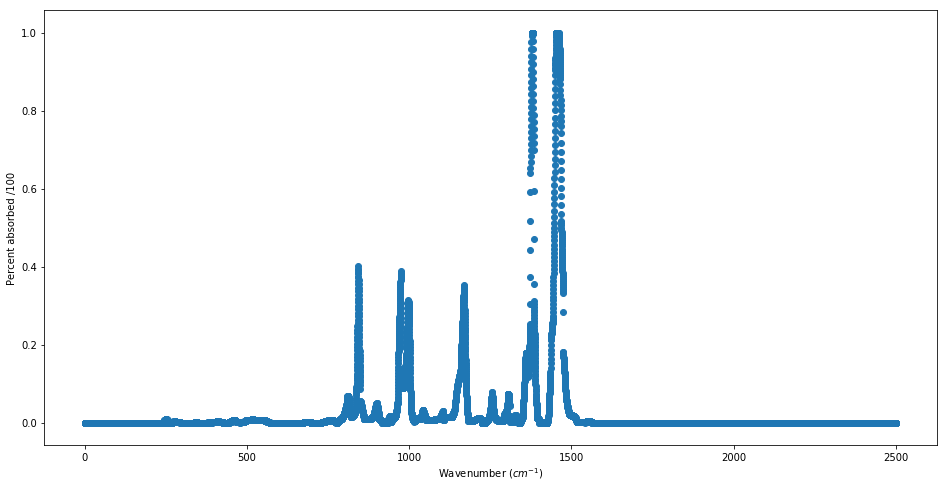

In [6]:
fig = plt.figure(figsize=(16, 8))
plt.scatter(wavenums, percent_abs)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Percent absorbed /100')
plt.show()

**NOTE TO RACHEL:**
    - Below I changed all the ts to rs because they represent reflection and not transmission
    - I can't find pp dispersion curves anywhere...maybe we will need to ask Jon to give them to us...
    - Once we have that, it should be easy to find transmission, as it is just 1-a-r. Above gives us a so we are just missing r, which we already have the code for.

In [7]:
n_air = 1

#assume theta = 90 

In [8]:
# calculate refractive index as function of wavenums

def R(wn):
    '''
    Calculate reflectance as function of wavenumber
    First use dispersion formula for window material to calculate refractive index as function of wavenumber
    Then use Fresnel equations to calculate transmissivty as function of refractive index
    '''
    l = 10000/wn #wavelength
    #n_ZnSe = np.sqrt(4+1.9*l**2/(l**2 -.113))
    n_ZnSe = np.sqrt(1+(4.45813734*l**2/(l**2 -0.200859853**2))+(0.467216334*l**2/(l**2 -0.391371166**2))+(2.89566290*l**2/(l**2 -47.1362108**2)))
    
    #from air to material
    r1 = 2*n_air/(n_air+n_ZnSe)
    
    #from material to air
    r2 = 2*n_ZnSe/(n_air+n_ZnSe)

    R= (r1*r2)**2
    
    return(R, n_ZnSe)

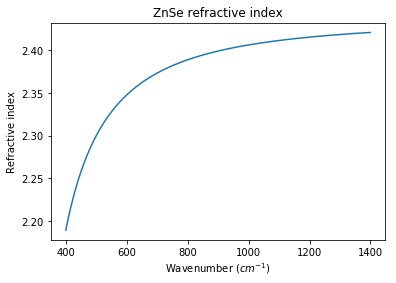

In [9]:
wns = np.arange(400, 1400, 1)

R_vec = np.vectorize(R)
R_ZnSe, n_ZnSe = R_vec(wns)

plt.plot(wns, n_ZnSe) # convert micrometer wavelength into cm-1 wavenumber
plt.title('ZnSe refractive index')
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Refractive index')
plt.show()

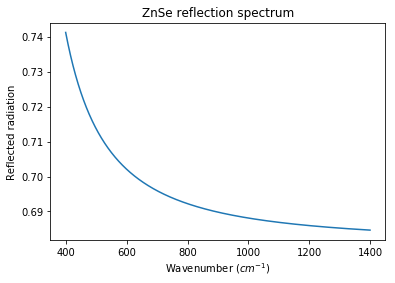

In [10]:
plt.plot(wns, R_ZnSe)
plt.title('ZnSe reflection spectrum')
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Reflected radiation')
plt.show()

NOTES from meeting with Jon:

have to also use absoroptriinm coeff from fresnel
t=1-r-a
need tgickness of znse
or infer a from fresnel coefficients 
poly below 400 doesnt have a features

can get R from fresnel
we can look at relative transmission between znse and pp (from resp functions)

have to make assumption that Znse or pp A in cutoff region. around 400 wns pp has no absorption features - > can assume App much less than Aznse
can say that ratio in resp functions between the two is mainly due to absorption in ZnSe

Jon can send us poly refraction for low wns

